In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

# 1. Read in data

In [62]:
# Heatmap
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Masks for clients
clients = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_clients = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_clients = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_clients = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

# SASA data
sasa_df = pd.read_csv('../../utils/analysis_utils/sasa.csv', index_col=0)

# Trim SASA df to only positions included in the DMS
sasa_df = sasa_df.loc[src_utils.__cd_pos__, :]

# Is there a correlation between SASA asnd client status?

In [58]:
resid_map.values[clients].shape

(645,)

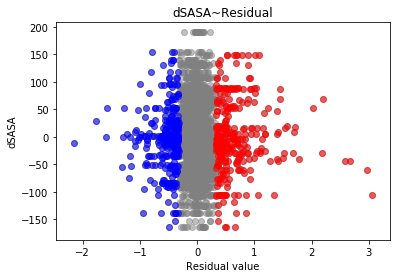

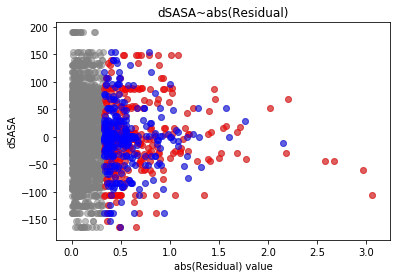

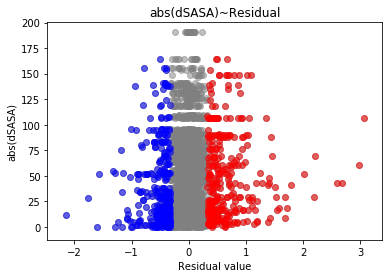

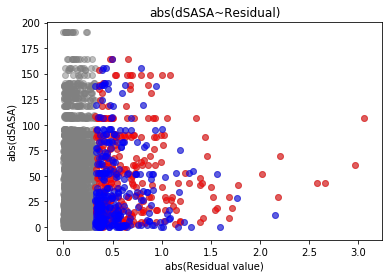

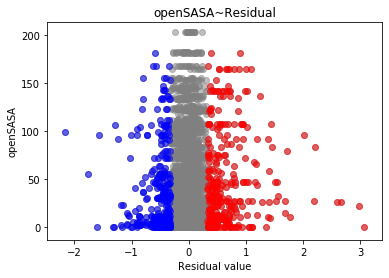

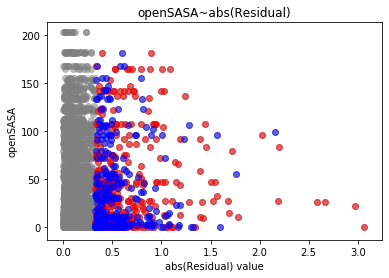

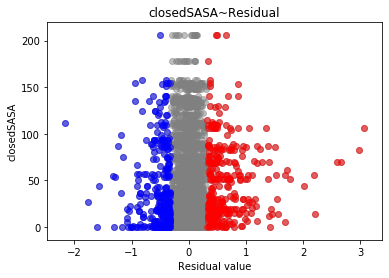

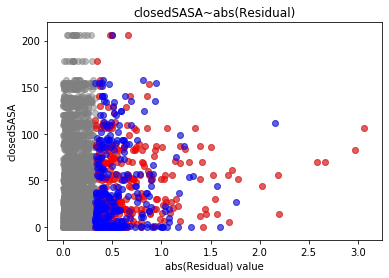

In [70]:
"""dSASA"""
# Expand dSASA it fits resid_map layout
dSASA = sasa_df['diff_sasa'].values
dSASA = np.expand_dims(dSASA, axis=1)
dSASA = np.repeat(dSASA, repeats=resid_map.shape[1], axis=1)

# Raw plot
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
# plt.scatter((resid_map.values[clients]).flatten(), dSASA[clients].flatten())
plt.scatter((resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.ylabel('dSASA')
plt.title('dSASA~Residual')
plt.show()

# Absolute value of residual to define client strength
plt.scatter(abs(resid_map.values).flatten(), dSASA.flatten(), color='gray', alpha=0.5)
# plt.scatter(abs(resid_map.values[clients]).flatten(), dSASA[clients].flatten())
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.xlabel('abs(Residual) value')
plt.ylabel('dSASA')
plt.title('dSASA~abs(Residual)')
plt.show()

# Absolute value of dSASA
plt.scatter(resid_map.values.flatten(), abs(dSASA).flatten(), color='gray', alpha=0.5)
#plt.scatter(resid_map.values[clients].flatten(), abs(dSASA[clients]).flatten())
plt.scatter((resid_map.values[ihb_clients]).flatten(), abs(dSASA[ihb_clients]).flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), abs(dSASA[dep_clients]).flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.xlabel('Residual value')
plt.ylabel('abs(dSASA)')
plt.title('abs(dSASA)~Residual')
plt.show()

# Absolute value of both
plt.scatter(abs(resid_map.values).flatten(), abs(dSASA).flatten(), color='gray', alpha=0.5)
#plt.scatter(abs(resid_map.values[clients]).flatten(), abs(dSASA[clients]).flatten())
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), abs(dSASA[ihb_clients]).flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), abs(dSASA[dep_clients]).flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.xlabel('abs(Residual value)')
plt.ylabel('abs(dSASA)')
plt.title('abs(dSASA~Residual)')
plt.show()


"""Open SASA"""
# Expand dSASA it fits resid_map layout
dSASA = sasa_df['open'].values
dSASA = np.expand_dims(dSASA, axis=1)
dSASA = np.repeat(dSASA, repeats=resid_map.shape[1], axis=1)

# Raw plot
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter((resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.ylabel('openSASA')
plt.title('openSASA~Residual')
plt.show()

# Absolute value of residual to define client strength
plt.scatter(abs(resid_map.values).flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('abs(Residual) value')
plt.ylabel('openSASA')
plt.title('openSASA~abs(Residual)')
plt.show()


"""Closed SASA"""
# Expand dSASA it fits resid_map layout
dSASA = sasa_df['closed'].values
dSASA = np.expand_dims(dSASA, axis=1)
dSASA = np.repeat(dSASA, repeats=resid_map.shape[1], axis=1)

# Raw plot
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter((resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.ylabel('closedSASA')
plt.title('closedSASA~Residual')
plt.show()

# Absolute value of residual to define client strength
plt.scatter(abs(resid_map.values).flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('abs(Residual) value')
plt.ylabel('closedSASA')
plt.title('closedSASA~abs(Residual)')
plt.show()


In [ ]:
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')


In [80]:
import statsmodels.api as sm

mod = sm.OLS(dSASA.flatten(),resid_map.values.flatten(), missing='drop')

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']

TypeError: list indices must be integers or slices, not str

In [ ]:
plt.scatter((resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')